### *This Notebook is for prepping the kind of functions that will be implemented and is a mess*

In [6]:
import timm

import sys
import json
from pathlib import Path

# src root is on sys.path so we can import dl2.utils
notebook_dir = Path.cwd()
src_root = notebook_dir.parent.parent  # .../src
if str(src_root) not in sys.path:
	sys.path.append(str(src_root))

from dl2.utils import get_file_names, inference, inferencev2, plot_image, get_file_path

In [7]:

path = "..\\checkpoints"

file_names = get_file_names(path)
file_names

[]

In [8]:
with open("..\\class_names.json") as f:
    class_names = json.load(f)
class_names


{'0': 'Apple___Apple_scab',
 '1': 'Apple___Black_rot',
 '2': 'Apple___Cedar_apple_rust',
 '3': 'Apple___healthy',
 '4': 'Blueberry___healthy',
 '5': 'Cherry_(including_sour)___Powdery_mildew',
 '6': 'Cherry_(including_sour)___healthy',
 '7': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 '8': 'Corn_(maize)___Common_rust_',
 '9': 'Corn_(maize)___Northern_Leaf_Blight',
 '10': 'Corn_(maize)___healthy',
 '11': 'Grape___Black_rot',
 '12': 'Grape___Esca_(Black_Measles)',
 '13': 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 '14': 'Grape___healthy',
 '15': 'Orange___Haunglongbing_(Citrus_greening)',
 '16': 'Peach___Bacterial_spot',
 '17': 'Peach___healthy',
 '18': 'Pepper,_bell___Bacterial_spot',
 '19': 'Pepper,_bell___healthy',
 '20': 'Potato___Early_blight',
 '21': 'Potato___Late_blight',
 '22': 'Potato___healthy',
 '23': 'Raspberry___healthy',
 '24': 'Soybean___healthy',
 '25': 'Squash___Powdery_mildew',
 '26': 'Strawberry___Leaf_scorch',
 '27': 'Strawberry___healthy',
 '28': 'Toma

In [9]:
resnet = timm.create_model(
    'resnet18',
    pretrained=False,
    num_classes=39,
    checkpoint_path=get_file_path('checkpoints') + '\\' + 'resnet_stage2_finetuning.pth'
)

In [10]:
from PIL import Image

random_img = Image.open("cup.jpg")
predicted_index = inference(random_img, resnet)
class_names[str(predicted_index)]

FileNotFoundError: [Errno 2] No such file or directory: 'cup.jpg'

**I rewrote the inference fuction `inferencev2` to output more things i.e grad-cam overlay and predications**

c:\Users\Dan\miniconda3\envs\dl\Lib\site-packages\torch\nn\modules\module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


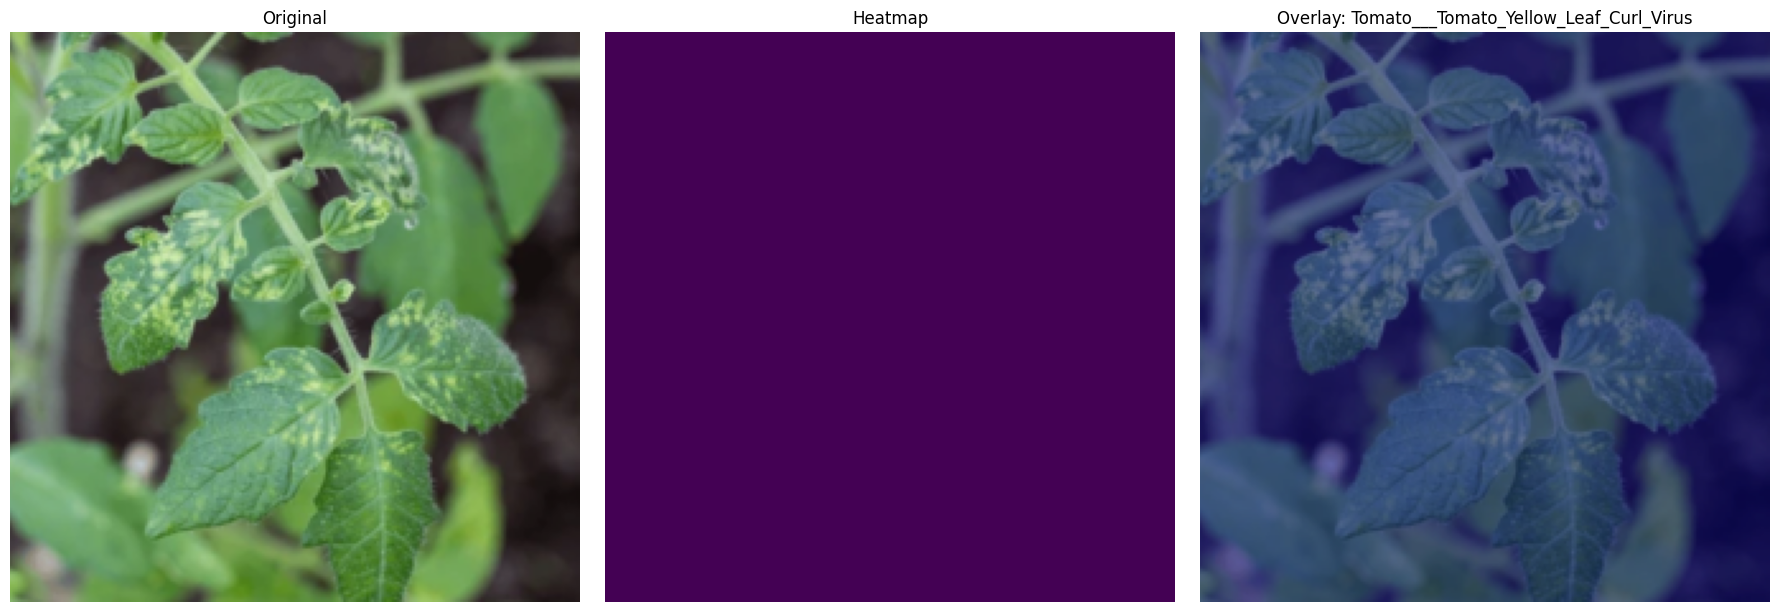

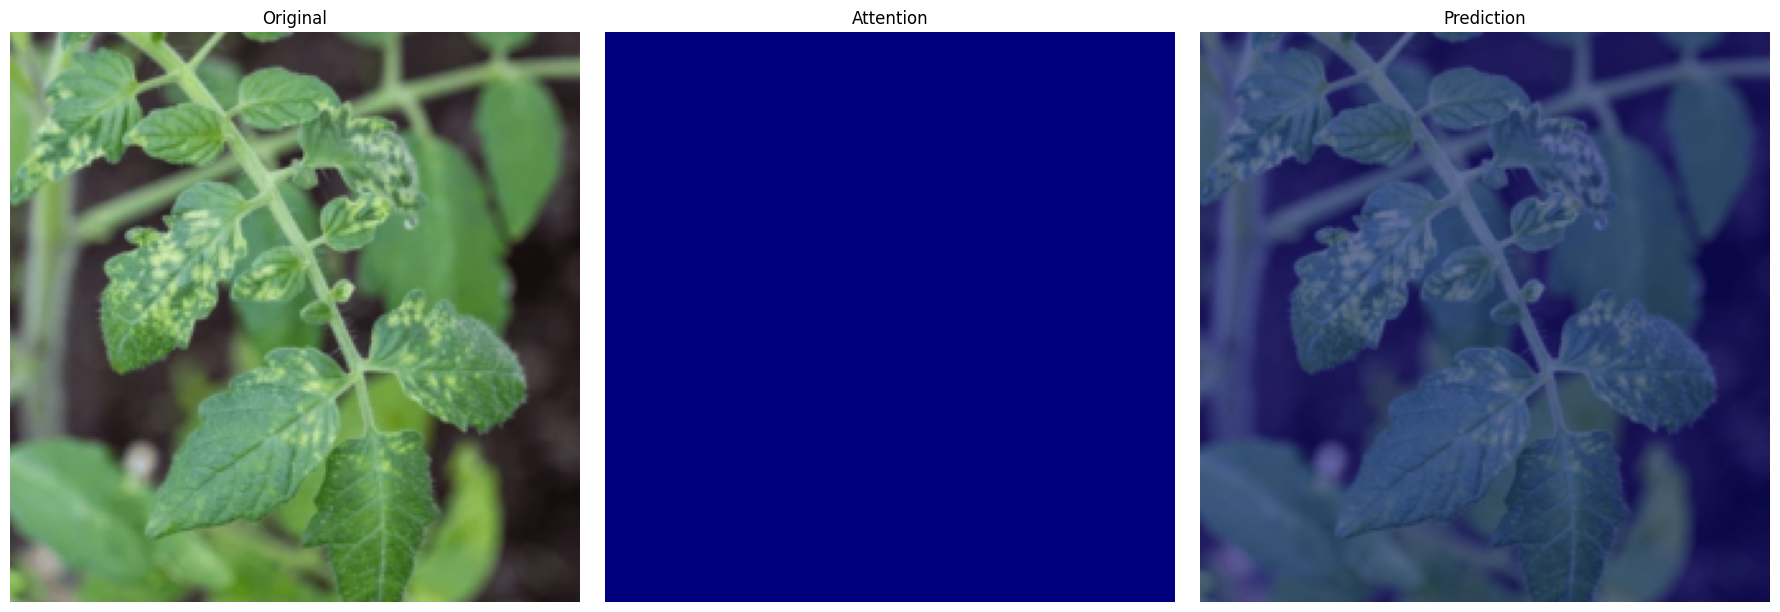

In [14]:
img = Image.open("cup.jpeg")
original, heatmap, overlay, pred_idx = inferencev2(img, resnet)

plot_image([original, heatmap, overlay], 
           titles=["Original", "Heatmap", f"Overlay: {class_names[str(pred_idx)]}"],
           cmap=None)

# with 'jet' colormap
plot_image([original, heatmap, overlay], 
           titles=["Original", "Attention", "Prediction"], cmap='jet')

🤣🤣🤣🤣🤣
